<a href="https://colab.research.google.com/github/Haalibrahim/NLP/blob/main/projects/SecurityClearanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go 

In [ ]:
!pip install tensorflow tensorflow_hub tensorflow_text

     |████████████████████████████████| 4.9 MB 5.0 MB/s 
     |████████████████████████████████| 462 kB 77.3 MB/s 


In [ ]:
df = pd.read_csv("/content/Security_Clearance_merged.csv", index_col=0)

In [ ]:
df.head()

,author,body,retrieved_on,score,parent_id,subreddit
Column1,,,,,,
0,10579,No doctors that I was aware of... It was mostl...,1561988202,1,t1_en4krlu,SecurityClearance
0,10-Mar,I did save it and open it in Foxit and those b...,1545159449,1,t1_e96wdqb,SecurityClearance
1,10-Mar,&gt;case was supposed to be sealed but the FBI...,1548217217,2,t1_ecsi4kl,SecurityClearance
1,10-Mar,Awesome. Thanks.,1581770872,1,t1_f7e1au1,SecurityClearance
0,10-Mar,Cool.,1581773553,1,t1_f7edui7,SecurityClearance


In [ ]:
docs= list(df.loc[:, "body"].values)

In [ ]:
docs[4]

'Cool.'

In [ ]:
!pip install -q top2vec

     |████████████████████████████████| 24.1 MB 1.2 MB/s 
     |████████████████████████████████| 5.2 MB 35.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 1.1 MB 53.2 MB/s 


In [ ]:
from top2vec import Top2Vec

In [ ]:
model=Top2Vec(docs, embedding_model='universal-sentence-encoder')

2022-04-26 17:35:33,941 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-04-26 17:35:41,134 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-04-26 17:36:02,203 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-04-26 17:36:14,955 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

In [ ]:
model.get_num_topics()

94

In [ ]:
topic_words, word_scores,topic_nums = model.get_topics(7)

In [ ]:
model.get_topic_sizes()

(array([2583, 1141, 1001,  946,  860,  699,  660,  574,  555,  506,  481,
         469,  453,  434,  432,  426,  424,  420,  383,  374,  349,  337,
         330,  325,  319,  317,  294,  292,  287,  277,  275,  269,  266,
         240,  226,  212,  208,  203,  202,  191,  182,  179,  176,  175,
         168,  159,  157,  156,  156,  154,  150,  146,  133,  131,  125,
         122,  108,  107,  107,   99,   95,   93,   92,   91,   89,   88,
          87,   84,   83,   81,   80,   80,   79,   79,   75,   74,   67,
          67,   63,   63,   60,   59,   57,   51,   48,   40,   39,   36,
          36,   34,   30,   29,   26,   21]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80

In [ ]:
model.get_topics()

(array([['deleted', 'removed', 'delete', ..., 'still', 'sorry', 'pulled'],
        ['citizenship', 'passports', 'passport', ..., 'doha',
         'involvement', 'spouse'],
        ['polygraphs', 'drugs', 'drug', ..., 'quit', 'officer', 'lying'],
        ...,
        ['bot', 'subreddit', 'fucking', ..., 'standard', 'frequency',
         'response'],
        ['sent', 'message', 'send', ..., 'submitting', 'receiving',
         'same'],
        ['welcome', 'your', 'you', ..., 'plus', 'cool', 'it']],
       dtype='<U15'),
 array([[0.9999988 , 0.7724374 , 0.62974346, ..., 0.427925  , 0.42635342,
         0.4259646 ],
        [0.46141246, 0.3956965 , 0.37975422, ..., 0.19934604, 0.19786848,
         0.19689456],
        [0.42547062, 0.413397  , 0.41043365, ..., 0.20204265, 0.20061746,
         0.20060451],
        ...,
        [0.8598521 , 0.33218837, 0.33021158, ..., 0.21702155, 0.21500951,
         0.21485788],
        [0.719936  , 0.577974  , 0.5488852 , ..., 0.33850068, 0.33778542,
      

In [ ]:
model.topic_words

array([['deleted', 'removed', 'delete', ..., 'still', 'sorry', 'pulled'],
       ['citizenship', 'passports', 'passport', ..., 'doha',
        'involvement', 'spouse'],
       ['polygraphs', 'drugs', 'drug', ..., 'quit', 'officer', 'lying'],
       ...,
       ['bot', 'subreddit', 'fucking', ..., 'standard', 'frequency',
        'response'],
       ['sent', 'message', 'send', ..., 'submitting', 'receiving',
        'same'],
       ['welcome', 'your', 'you', ..., 'plus', 'cool', 'it']],
      dtype='<U15')

In [ ]:
# Finding documents that are similar in the same theme:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=8, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.7815160751342773
-----------
The way you respond to questions.... It's a bit peculiar lol. I can see why the investigator doesn't trust you.  Did your employer give you a layoff notice/termination document at the end of your employment?  One last thing so you didn't apply for unemployment after you stopped working for them is that right?
-----------

Document: 5389, Score: 0.7744919061660767
-----------
Explain on your OF306 that you were fired even though your old boss said she would give you a positive reference. When NBIB sends the info requests to employers they look very official and formal and most HRs are not likely to be creative on them since it is the government asking.  That being said as long as you are very honest an employment termination will not prevent you getting a clearance.
-----------

Document: 8541, Score: 0.7716017961502075
-----------
Investigators want to know the facts.  Tell him/her your side of that employment.  Why would you be mar

In [ ]:
# Searching for similar keywords
words, word_scores = model.similar_words(keywords=["Cocaine"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

drug 0.5972442366910331
drugs 0.5901594791711544
weed 0.5189187374659763
marijuana 0.4951378059721055
air 0.42131627512950043
smoking 0.42084366949745267
alcohol 0.41699297012781916
pot 0.41586076294242624
smoke 0.4147388538645493
drinking 0.4133954742866601


In [ ]:
# Extracting key words from the abstracts
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["truth","lie"], num_docs=300)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.7204477441482404
-----------
Tell the truth.
-----------

Document: 5389, Score: 0.7204477441482404
-----------
Tell the truth.
-----------

Document: 8541, Score: 0.7204477409872525
-----------
Tell the truth
-----------

Document: 9978, Score: 0.6205018738164694
-----------
Truthfully.
-----------

Document: 4791, Score: 0.6205018738164694
-----------
Truthfully
-----------

Document: 7983, Score: 0.6197071609169384
-----------
Be honest
-----------

Document: 13309, Score: 0.6197071024561356
-----------
Be honest.
-----------

Document: 4998, Score: 0.5872820786797295
-----------
Don’t lie
-----------

Document: 11727, Score: 0.5556985918998623
-----------
Facts
-----------

Document: 3588, Score: 0.5108759023950509
-----------
be honest about it.
-----------



In [ ]:
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["travel"], num_docs=300)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.39138764960323735
-----------
Job
-----------

Document: 5389, Score: 0.3798625929039844
-----------
wormholerbtw
-----------

Document: 8541, Score: 0.37291000015299935
-----------
/r/legaladvice
-----------

Document: 9978, Score: 0.37081194253092864
-----------
That’s what my answer was about. List all foreign travel for all foreign passports.
-----------

Document: 4791, Score: 0.3529677650972913
-----------
13 days
-----------

Document: 7983, Score: 0.35157189929286187
-----------
So long as you can account for where you stayed purpose of visit how you paid for the trip and if you remain in contact with any FORNATs from your trip you should be fine.
-----------

Document: 13309, Score: 0.34858586311919876
-----------
[https://travel.state.gov/content/travel/en/traveladvisories/traveladvisories.html/](https://travel.state.gov/content/travel/en/traveladvisories/traveladvisories.html/)  &amp;#x200B;  This is more for travel but is a good point of reference. 

In [ ]:
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["bankruptcy"], num_docs=300)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.8445399946756207
-----------
I DECLARE BANKRUPTCY
-----------

Document: 5389, Score: 0.7120573258548218
-----------
have you considered filing bankruptcy?
-----------

Document: 8541, Score: 0.6255313246878342
-----------
This may be your worst advice yet.   OP DO **NOT** file bankruptcy!! Get on a payment plan and build a history of payments. Bankruptcy will ensure you NEVER get a clearance in the foreseeable future.
-----------

Document: 9978, Score: 0.6026336931657355
-----------
Great. It’d be insane to declare bankruptcy for $9k of credit card debt. Remember that student loans don’t fall under bankruptcy.
-----------

Document: 4791, Score: 0.5978414670095182
-----------
You should explain why you declared bankruptcy. Bankruptcy due to medical debt or losing your job is nowhere near as bad as if you lost a lot gambling.
-----------

Document: 7983, Score: 0.5799247251409066
-----------
Student loans can't be taken care of with a bankruptcy.
-----------



In [ ]:
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["debt"], num_docs=300)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.5980499592678795
-----------
&gt; My debt is about 25k altogether.   What kind of debt? Not al debt is created equal.  Debt from a car or student loan is significantly different than debt from gambeling.
-----------

Document: 5389, Score: 0.5812732864428556
-----------
They only ask about bad debt/delinquent debt not debt in general
-----------

Document: 8541, Score: 0.5755170332925386
-----------
It's only a problem if you have too much debt and/or are delinquent on it. Just having debt isn't a problem.
-----------

Document: 9978, Score: 0.5671306620119008
-----------
Nah shouldn’t matter. I took on a decent amount of debt during my investigation but I’ve always maintained good credit and never missed a payment on anything and my debt never even came up as a factor. Student loan debt is generally considered more forgivable as well.
-----------

Document: 4791, Score: 0.5621020445691726
-----------
A history showing you’ve been making payments and have been 

In [ ]:
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["drugs", "marijuana","pot"], num_docs=300)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.5713999429573433
-----------
Are all of those drug usages marijuana?
-----------

Document: 5389, Score: 0.5189485687621983
-----------
Depends on the drugs of choice. Pot is still bad but 6 months is good. Harder drugs could go either way.
-----------

Document: 8541, Score: 0.5116746853195814
-----------
Even with drugs other than weed?
-----------

Document: 9978, Score: 0.49821624327903835
-----------
I barely did drugs. Only drug I did was marijuana.  I only smoked weed once in awhile back then. Nothing else aside from that.
-----------

Document: 4791, Score: 0.4797878888071248
-----------
I don't think you have any chance of getting a clearance right now.  The good news is drug use can be mitigated over time and the fact it was experimental use.  You'll need about a year for the marijuana use and probably a few years for the rest of the illegal drugs / misuse of prescription drugs.
-----------

Document: 7983, Score: 0.47007010578423136
-----------
You s

In [ ]:
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["medication"], num_docs=300)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.47803435915045167
-----------
The answer I think you are looking for is the wording of the question which is any misuse of prescription medication. This includes abusing or taking meds not prescribed to you.
-----------

Document: 5389, Score: 0.45484245917375815
-----------
Yes I have BP meds pain meds nerve meds all on my prescription list.
-----------

Document: 8541, Score: 0.4438713492370372
-----------
LSD is not a prescription medication.
-----------

Document: 9978, Score: 0.4384833557742653
-----------
It depends are you still taking medication for it?
-----------

Document: 4791, Score: 0.4372533847517376
-----------
I was off medication for almost a decade. I went on a light anti-anxiety medication about 2 years ago but I don't think there was ever an official diagnosis for anxiety. I'd have to ask my doctor
-----------

Document: 7983, Score: 0.43685123042022633
-----------
When you say \all the medication\" that you take are you talking multiple pr

In [ ]:
# Extracting key words from the abstracts
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["drugs"], num_docs=20)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8543, Score: 0.5710892673097573
-----------
Any drug involvement ?
-----------

Document: 5389, Score: 0.5516383532595627
-----------
Even with drugs other than weed?
-----------

Document: 8541, Score: 0.5303751776738308
-----------
No drug involvement.
-----------

Document: 9978, Score: 0.5023873826619482
-----------
Depends on the drugs of choice. Pot is still bad but 6 months is good. Harder drugs could go either way.
-----------

Document: 4791, Score: 0.4999304932728951
-----------
The odd is I didn't really do a lot of drugs. Like the cocaine and the LSD to be honest it was probably even fake drugs because I don't remember even feeling anything different. But oh well.
-----------

Document: 7983, Score: 0.49748063186098845
-----------
Are all of those drug usages marijuana?
-----------

Document: 13309, Score: 0.49184264698818053
-----------
LSD is not a prescription medication.
-----------

Document: 4998, Score: 0.48935042357402053
-----------
It’s not a drug use in

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

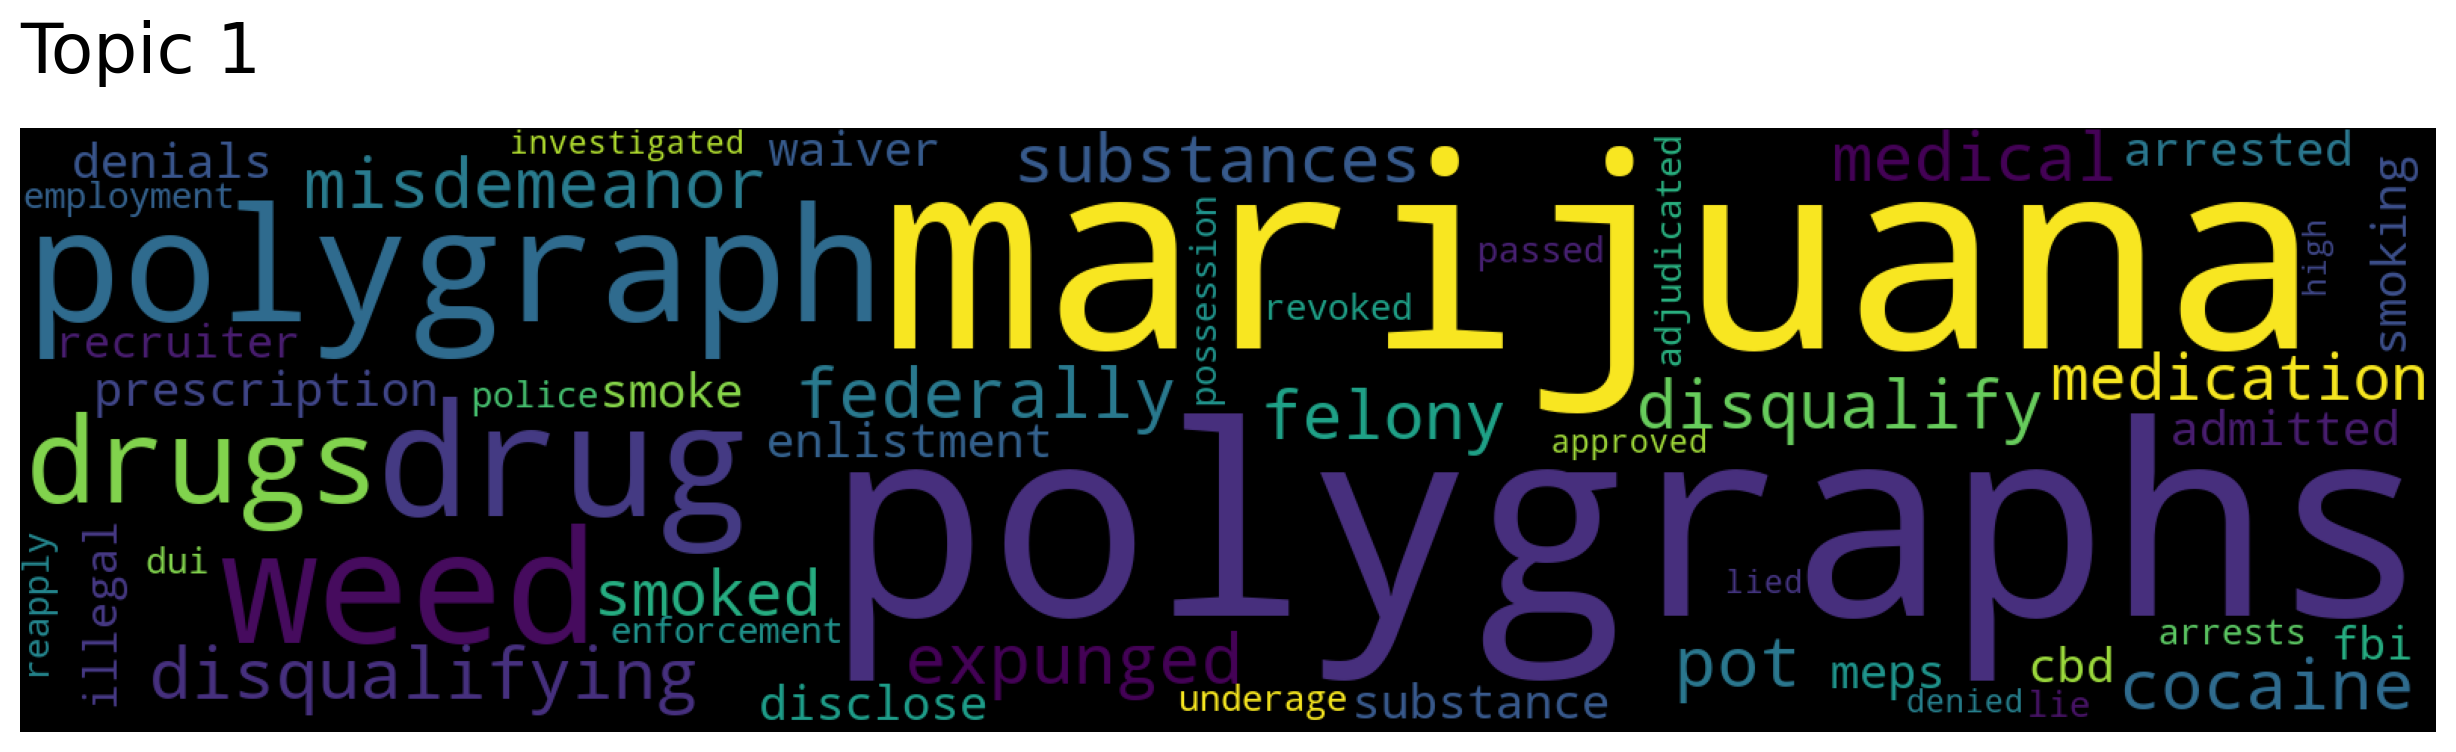

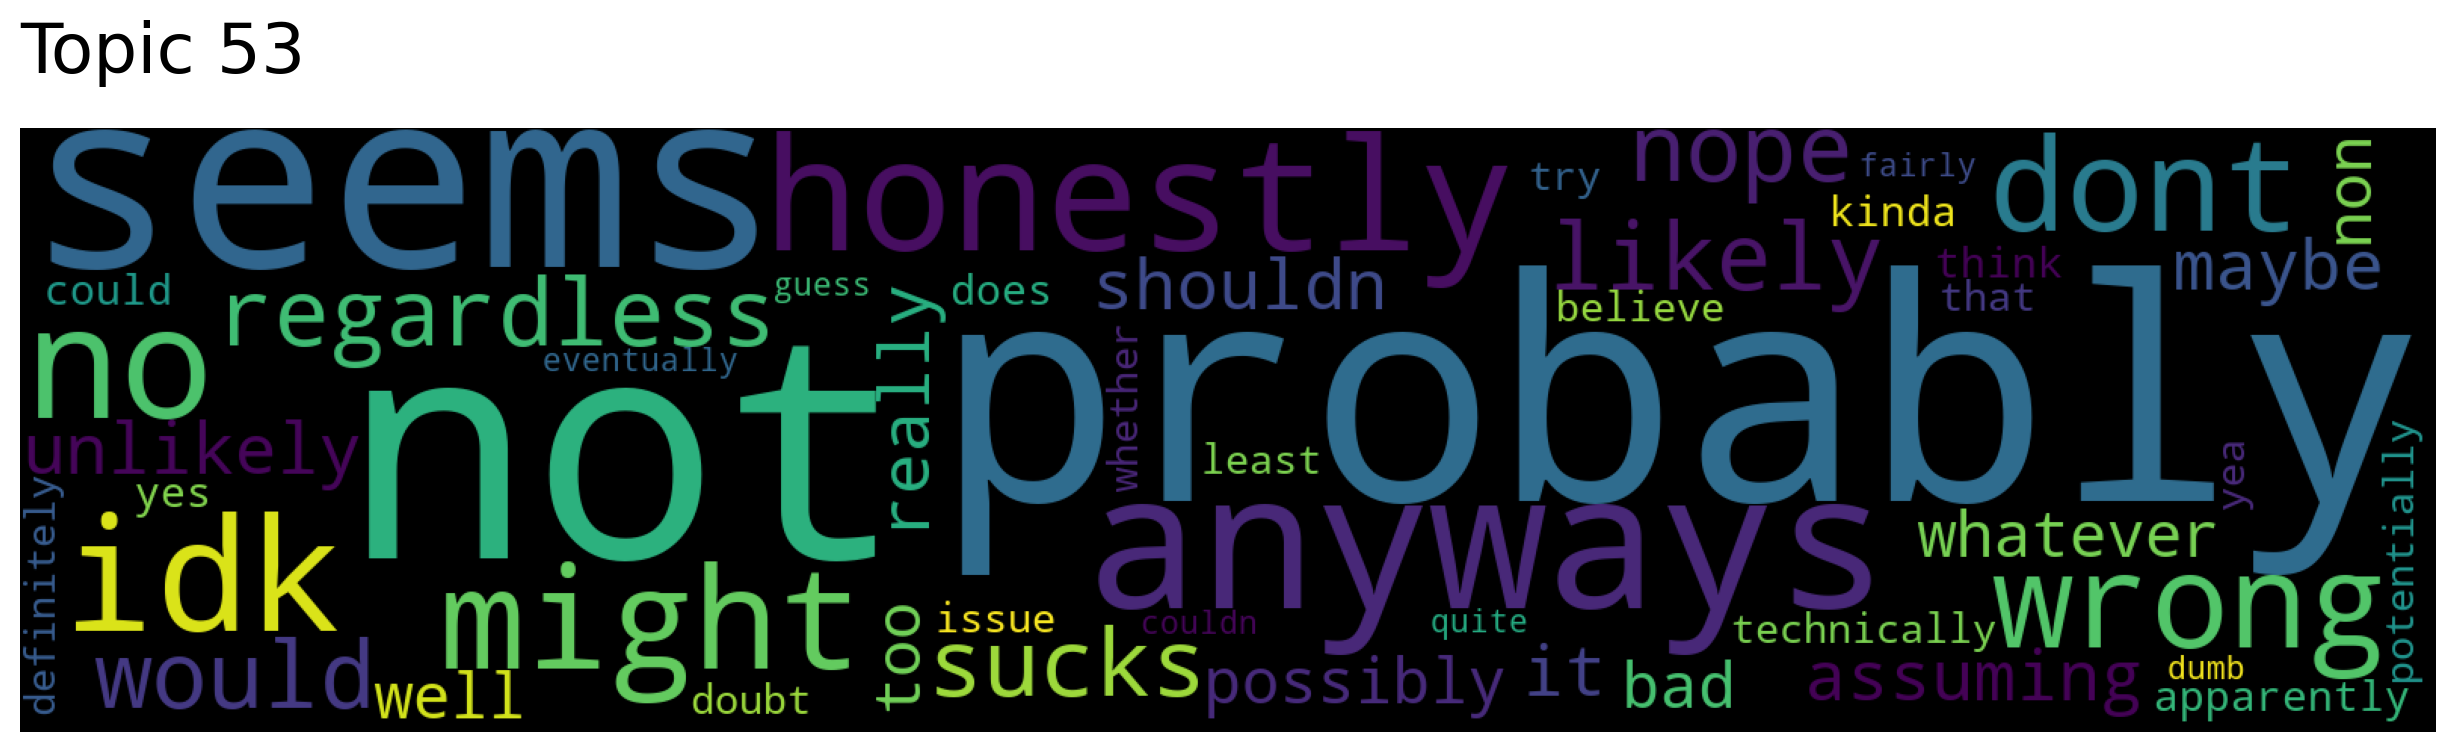

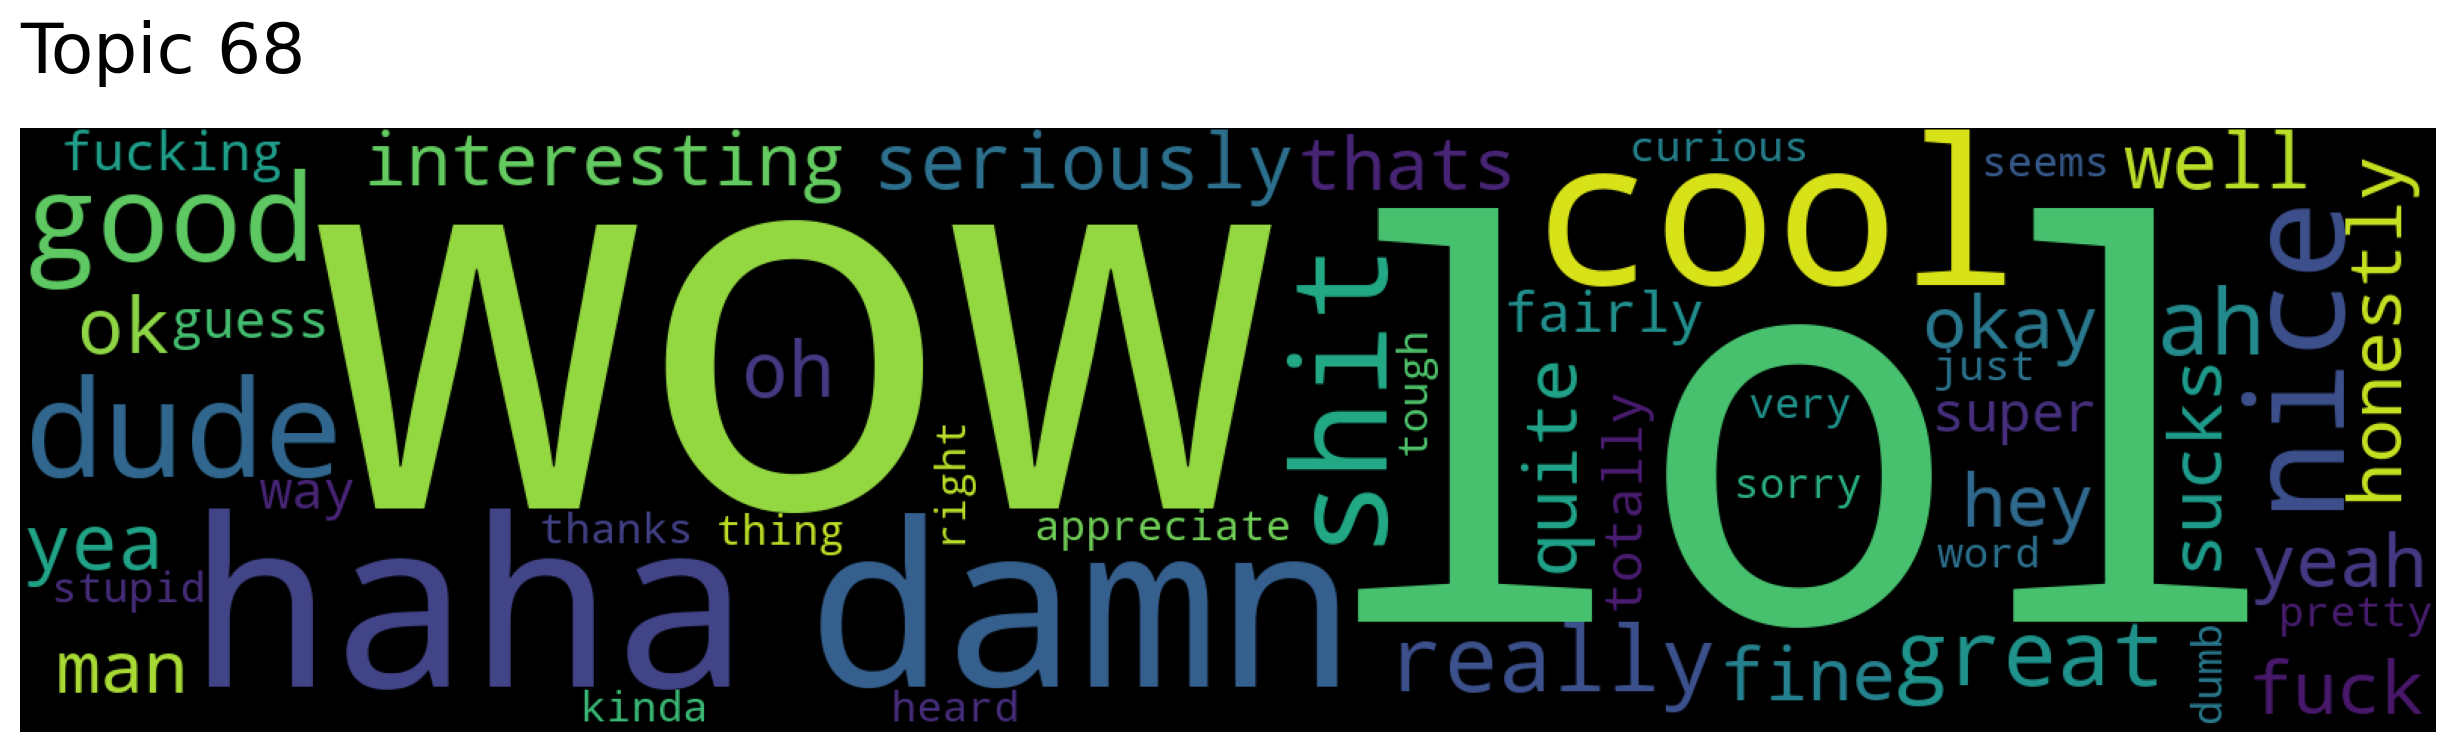

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["marijuana"],num_topics=3)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color="black")

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
ps = PorterStemmer()
wn = WordNetLemmatizer()
sentences= nltk.sent_tokenize(str(docs))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
corpus = []
for i in range(len(sentences)):
  review= re.sub('[^a-zA-Z]', ' ', sentences[i])
  review=review.lower()
  review=review.split()
  review=[ wn.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review= ' '.join(review)
  corpus.append(review)

In [ ]:
type(corpus)

list

In [ ]:
corpus[0:10]

['would really like see sub gain popularity accurate information regarding security clearance',
 'fso really bug amount misinformation floating around',
 'anyway pdf posted opm cost projection security clearance tier level listed agree lot misinformation posted internet would like see sub contribute accurate information regarding security clearance',
 'pricing seems little low complicated investigation may come across',
 'wonder conduct loss make investigation require little work',
 'perhaps',
 'also wondering l ci poly since really include unless overlooked',
 'think would fall sap',
 'would fbi instead opm',
 'sure deal sap far know opm conduct polygraph conducted respective intelligence law enforcement agency separate ssbi investigation done opm']

In [ ]:
# Here I am looking for the most frequent words in text, in this case I used my clean corpus
words= nltk.word_tokenize(str(corpus))
fd = nltk.FreqDist(words)

In [ ]:
fd.tabulate(20)

            ,             '     clearance           get         would          year          like          drug          time           job      question investigation           use   information        people           may       contact           one      security          know 
        63689         63113          6631          3490          3252          2895          2690          2654          2537          2424          2369          2342          2321          2256          2174          2161          2149          2137          2104          2069 


In [ ]:
from textblob import TextBlob
df['polarity'] = df['body'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['body'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df.head()

,author,body,retrieved_on,score,parent_id,subreddit,polarity,subjective
0,-Vexor-,I would really like to see this sub gain popul...,1499206475,1,t3_6g9yn9,SecurityClearance,0.266667,0.344444
0,gpupdate,I agree that there is a lot misinformation pos...,1499321768,2,t1_diom0wc,SecurityClearance,-0.100000,0.551389
1,-Vexor-,Perhaps. I was also wondering about LS and CI ...,1499321865,2,t1_div279q,SecurityClearance,-0.025000,0.544444
2,gpupdate,As far as I know OPM does not conduct polygrap...,1499322132,1,t1_div2eg0,SecurityClearance,0.088889,0.477778
0,gpupdate,Did you previously hold a secret clearance pri...,1499371740,2,t3_6hflbv,SecurityClearance,-0.152778,0.297222


In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['body'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [ ]:
#Source: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, nmf)
pipe.fit(df['body'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0: abuse wait, index drug_use bot, use abuse wait
Topic #1: foreign contact, foreign influence, influence https
Topic #2: best luck, welcome best luck, welcome best



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=5)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df['body'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0: best luck, thank much, security clearance
Topic #1: amp x200b, security clearance, thank response
Topic #2: security clearance, sounds like, amp x200b
Topic #3: good luck, security clearance, sf 86
Topic #4: reddit com, https www reddit, www reddit



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_df=0.9, min_df=2)
dtm= cv.fit_transform(df['body'])



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=10 , random_state=42)
LDA.fit(dtm)


LatentDirichletAllocation(random_state=42)

In [ ]:
LDA.components_.shape

(10, 10143)

In [ ]:
single_topic= LDA.components_[0]

In [ ]:
single_topic.argsort()

array([3332, 7570,   15, ..., 5065, 9120, 7218])

In [ ]:
import numpy as np

In [ ]:
single_topic.argsort()[-10:]

array([6026, 7963,  735, 5719, 4372, 3010, 7226, 5065, 9120, 7218])

In [ ]:
top_twenty_words = single_topic.argsort()[-20:]

In [ ]:
for index in top_twenty_words:
    print(cv.get_feature_names()[index])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


classified information
security officer
ews clearancejobs
ews clearancejobs com
think ll
security manager
sf 86
close continuing contact
doesn mean
clearancejobs com
close continuing
continuing contact
clearance process
ts sci
don think
good luck
drug use
amp x200b
don know
security clearance


In [ ]:
for index in top_twenty_words:
    print(cv.get_feature_names()[index])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


sf86
think
alcohol
asked
report
ask
ve
like
issues
just
need
say
answer
mental
health
don
questions
issue
thank
question


In [ ]:
#Grab the highest probability word per topic
for index,topic in enumerate(LDA.components_):
    print(f"The Top tewnty words for topic number {index}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-20:]])
    print('\n')
    print('\n')

The Top tewnty words for topic number 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['sf86', 'think', 'alcohol', 'asked', 'report', 'ask', 've', 'like', 'issues', 'just', 'need', 'say', 'answer', 'mental', 'health', 'don', 'questions', 'issue', 'thank', 'question']




The Top tewnty words for topic number 1
['sure', 've', 'people', 'job', 'good', 'really', 'want', 'll', 'honest', 'think', 'like', 'years', 'thanks', 'clearance', 'drug', 'know', 'time', 'use', 'don', 'just']




The Top tewnty words for topic number 2
['did', 'doing', 'working', 'investigator', 'field', 'discharge', 'thing', 'idea', 'employment', 'area', 'government', 'federal', 'investigators', 'good', 'lie', 'like', 'private', 'job', 'just', 'deleted']




The Top tewnty words for topic number 3
['don', 'sci', 'adjudication', 'know', 'new', 'agency', 'need', 'time', 'work', 'company', 'just', 'interim', 'months', 'ts', 'security', 'secret', 'process', 'job', 'investigation', 'clearance']




The Top tewnty words for topic number 4
['sf86', 'address', 'person', 'references', 'questions', 'form', 'yes'

In [ ]:
topic_results = LDA.transform(dtm)

In [ ]:
topic_results.shape

(24306, 10)

In [ ]:
# finding the highest index of topic probability for each article 
# let us create a new index that will indicate the number of topic for each article
df['Topic']= topic_results.argmax(axis=1)

In [ ]:
df.head()

,author,body,retrieved_on,score,parent_id,subreddit,polarity,subjective,Topic
0,-Vexor-,I would really like to see this sub gain popul...,1499206475,1,t3_6g9yn9,SecurityClearance,0.266667,0.344444,7
0,gpupdate,I agree that there is a lot misinformation pos...,1499321768,2,t1_diom0wc,SecurityClearance,-0.100000,0.551389,7
1,-Vexor-,Perhaps. I was also wondering about LS and CI ...,1499321865,2,t1_div279q,SecurityClearance,-0.025000,0.544444,5
2,gpupdate,As far as I know OPM does not conduct polygrap...,1499322132,1,t1_div2eg0,SecurityClearance,0.088889,0.477778,5
0,gpupdate,Did you previously hold a secret clearance pri...,1499371740,2,t3_6hflbv,SecurityClearance,-0.152778,0.297222,5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['Topic'].value_counts()

1    4606
3    4023
2    2842
7    2756
4    2485
8    1876
0    1876
5    1637
6    1633
9     572
Name: Topic, dtype: int64

In [ ]:
!pip install pyLDAvis==3.2.2

     |████████████████████████████████| 1.7 MB 8.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135617 sha256=8c39612da4f4423eb8749704f682e817468e3bf3019d840c922c08d7bf110c8e
  Stored in directory: /root/.cache/pip/wheels/f8/b1/9b/560ac1931796b7303f7b517b949d2d31a4fbc512aad3b9f284
Successfully built pyLDAvis


In [ ]:
import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# clean the text before we create a graph
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

In [ ]:
df1=df.copy()

In [ ]:
df1.head()

,author,body,retrieved_on,score,parent_id,subreddit,polarity,subjective,Topic
0,-Vexor-,I would really like to see this sub gain popul...,1499206475,1,t3_6g9yn9,SecurityClearance,0.266667,0.344444,7
0,gpupdate,I agree that there is a lot misinformation pos...,1499321768,2,t1_diom0wc,SecurityClearance,-0.100000,0.551389,7
1,-Vexor-,Perhaps. I was also wondering about LS and CI ...,1499321865,2,t1_div279q,SecurityClearance,-0.025000,0.544444,5
2,gpupdate,As far as I know OPM does not conduct polygrap...,1499322132,1,t1_div2eg0,SecurityClearance,0.088889,0.477778,5
0,gpupdate,Did you previously hold a secret clearance pri...,1499371740,2,t3_6hflbv,SecurityClearance,-0.152778,0.297222,5


In [ ]:
df1['body']=df1['body'].apply(remove_stopwords)

In [ ]:
# after cleaning the text
df1.head()

,author,body,retrieved_on,score,parent_id,subreddit,polarity,subjective,Topic
0,-Vexor-,I would really like see sub gain popularity ac...,1499206475,1,t3_6g9yn9,SecurityClearance,0.266667,0.344444,7
0,gpupdate,I agree lot misinformation posted internet wou...,1499321768,2,t1_diom0wc,SecurityClearance,-0.100000,0.551389,7
1,-Vexor-,Perhaps. I also wondering LS CI poly's since r...,1499321865,2,t1_div279q,SecurityClearance,-0.025000,0.544444,5
2,gpupdate,As far I know OPM conduct polygraphs conducted...,1499322132,1,t1_div2eg0,SecurityClearance,0.088889,0.477778,5
0,gpupdate,Did previously hold secret clearance prior app...,1499371740,2,t3_6hflbv,SecurityClearance,-0.152778,0.297222,5


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
def lemmatization(texts,allowed_postags=['NOUN', 'VERB', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
%%capture
text_list=df['body'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
%%capture
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=90, passes=50,iterations=100)

In [ ]:
lda_model.print_topics()

[(0,
  '0.058*"investigator" + 0.050*"interview" + 0.043*"tell" + 0.042*"thank" + 0.027*"will" + 0.025*"good" + 0.025*"help" + 0.020*"know" + 0.020*"complete" + 0.016*"friend"'),
 (1,
  '0.075*"may" + 0.056*"concern" + 0.046*"information" + 0.038*"deal" + 0.024*"perform" + 0.023*"big" + 0.021*"r" + 0.020*"index" + 0.020*"moderator" + 0.020*"subreddit](/message"'),
 (2,
  '0.053*"company" + 0.051*"work" + 0.035*"deny" + 0.029*"same" + 0.029*"new" + 0.027*"clearance" + 0.026*"get" + 0.026*"job" + 0.019*"fine" + 0.018*"government"'),
 (3,
  '0.070*"question" + 0.060*"contact" + 0.033*"foreign" + 0.027*"use" + 0.021*"drug" + 0.021*"wait" + 0.021*"look" + 0.021*"response" + 0.018*"info" + 0.016*"let"'),
 (4,
  '0.111*"’" + 0.083*"be" + 0.034*"different" + 0.027*"week" + 0.014*"trust" + 0.013*"remember" + 0.012*"-" + 0.012*"non" + 0.012*"public" + 0.012*"lose"'),
 (5,
  '0.041*"federal" + 0.034*"remove" + 0.027*"law" + 0.026*"leave" + 0.021*"date" + 0.020*"bot" + 0.018*"make" + 0.017*"sense"

In [ ]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
#vis
pyLDAvis.save_html(vis, 'lda.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
users = df.groupby('author')

In [ ]:
users.head()

,author,body,retrieved_on,score,parent_id,subreddit,polarity,subjective
0,-Vexor-,I would really like to see this sub gain popul...,1499206475,1,t3_6g9yn9,SecurityClearance,0.266667,0.344444
0,gpupdate,I agree that there is a lot misinformation pos...,1499321768,2,t1_diom0wc,SecurityClearance,-0.100000,0.551389
1,-Vexor-,Perhaps. I was also wondering about LS and CI ...,1499321865,2,t1_div279q,SecurityClearance,-0.025000,0.544444
2,gpupdate,As far as I know OPM does not conduct polygrap...,1499322132,1,t1_div2eg0,SecurityClearance,0.088889,0.477778
0,gpupdate,Did you previously hold a secret clearance pri...,1499371740,2,t3_6hflbv,SecurityClearance,-0.152778,0.297222
...,...,...,...,...,...,...,...,...
0,NanoRegen,Thanks for the update yaztek. Currently on day...,1586434810,1,t3_ehtoxh,SecurityClearance,0.082143,0.338095
0,Xythen,I'm assuming this is not OFO as a CBPO is very...,1586439841,1,t1_ews53rm,SecurityClearance,0.260000,0.260000
0,John_Harrison1331,Ask your recruiter or the folks up at MEPS.,1586441736,1,t3_dd0sy8,SecurityClearance,0.000000,0.000000
1,LegalizeIt2020,Thank you for your comment. I no longer fall u...,1586446303,1,t1_fclvte0,SecurityClearance,0.072619,0.520238


In [ ]:
users = df.groupby(['author','score'])

In [ ]:
users.first()

body  \
author        score                                                      
--cole--       1     Ok thank you for the insight. And no honestly ...   
-3than         2     It's secret. I have essentially nothing these ...   
-Adjudicator-  2     I feel like the more likely part is that the O...   
-Vexor-       -1     This would be incorrect.   **Please don't spre...   
               0                                   Yes you do. Period.   
...                                                                ...   
zprice23       2     1. I would just mention in the notes section t...   
               3     It's hard to answer your question because like...   
zxtv123        1     Well I thought they’d see me as a drunk who co...   
zzyzzx2        1                                                  #NO!   
zzzt_zzzt      2                   Thanks I did work that incorrectly.   

                     retrieved_on   parent_id          subreddit  \
author        score                                                
--cole--       1       1579482558  t1_f4df8s6  SecurityClearance   
-3than         2       1538712280  t1_e5h1kiy  SecurityClearance   
-Adjudicator-  2       1506528206  t1_dmkwiv3  SecurityClearance   
-Vexor-       -1       1556051908  t1_eijoq2m  SecurityClearance   
               0       1571868756  t1_etk7s63  SecurityClearance   
...                           ...         ...                ...   
zprice23       2       1537718187   t3_98lsvj  SecurityClearance   
               3       1537759347   t3_98y7u2  SecurityClearance   
zxtv123        1       1576980674  t1_f0f1v6o  SecurityClearance   
zzyzzx2        1       1563237552   t3_bs111d  SecurityClearance   
zzzt_zzzt      2       1575626235  t1_ey9bgi4  SecurityClearance   

                         polarity  subjective  
author        score                            
--cole--       1     2.250000e-01    0.575000  
-3than         2     1.110223e-17    0.400000  
-Adjudicator-  2     2.265306e-01    0.462245  
-Vexor-       -1    -1.300000e-01    0.441111  
               0     0.000000e+00    0.000000  
...                           ...         ...  
zprice23       2     2.184444e-01    0.460190  
               3    -2.243590e-02    0.449573  
zxtv123        1    -4.500000e-01    0.850000  
zzyzzx2        1     0.000000e+00    0.000000  
zzzt_zzzt      2     2.000000e-01    0.200000  

[5114 rows x 6 columns]

In [ ]:
df1=df[['author','parent_id']]

In [ ]:
df1.head()

,author,parent_id
0,-Vexor-,t3_6g9yn9
0,gpupdate,t1_diom0wc
1,-Vexor-,t1_div279q
2,gpupdate,t1_div2eg0
0,gpupdate,t3_6hflbv


In [ ]:
#network analysis
import networkx as nx
G = nx.Graph()

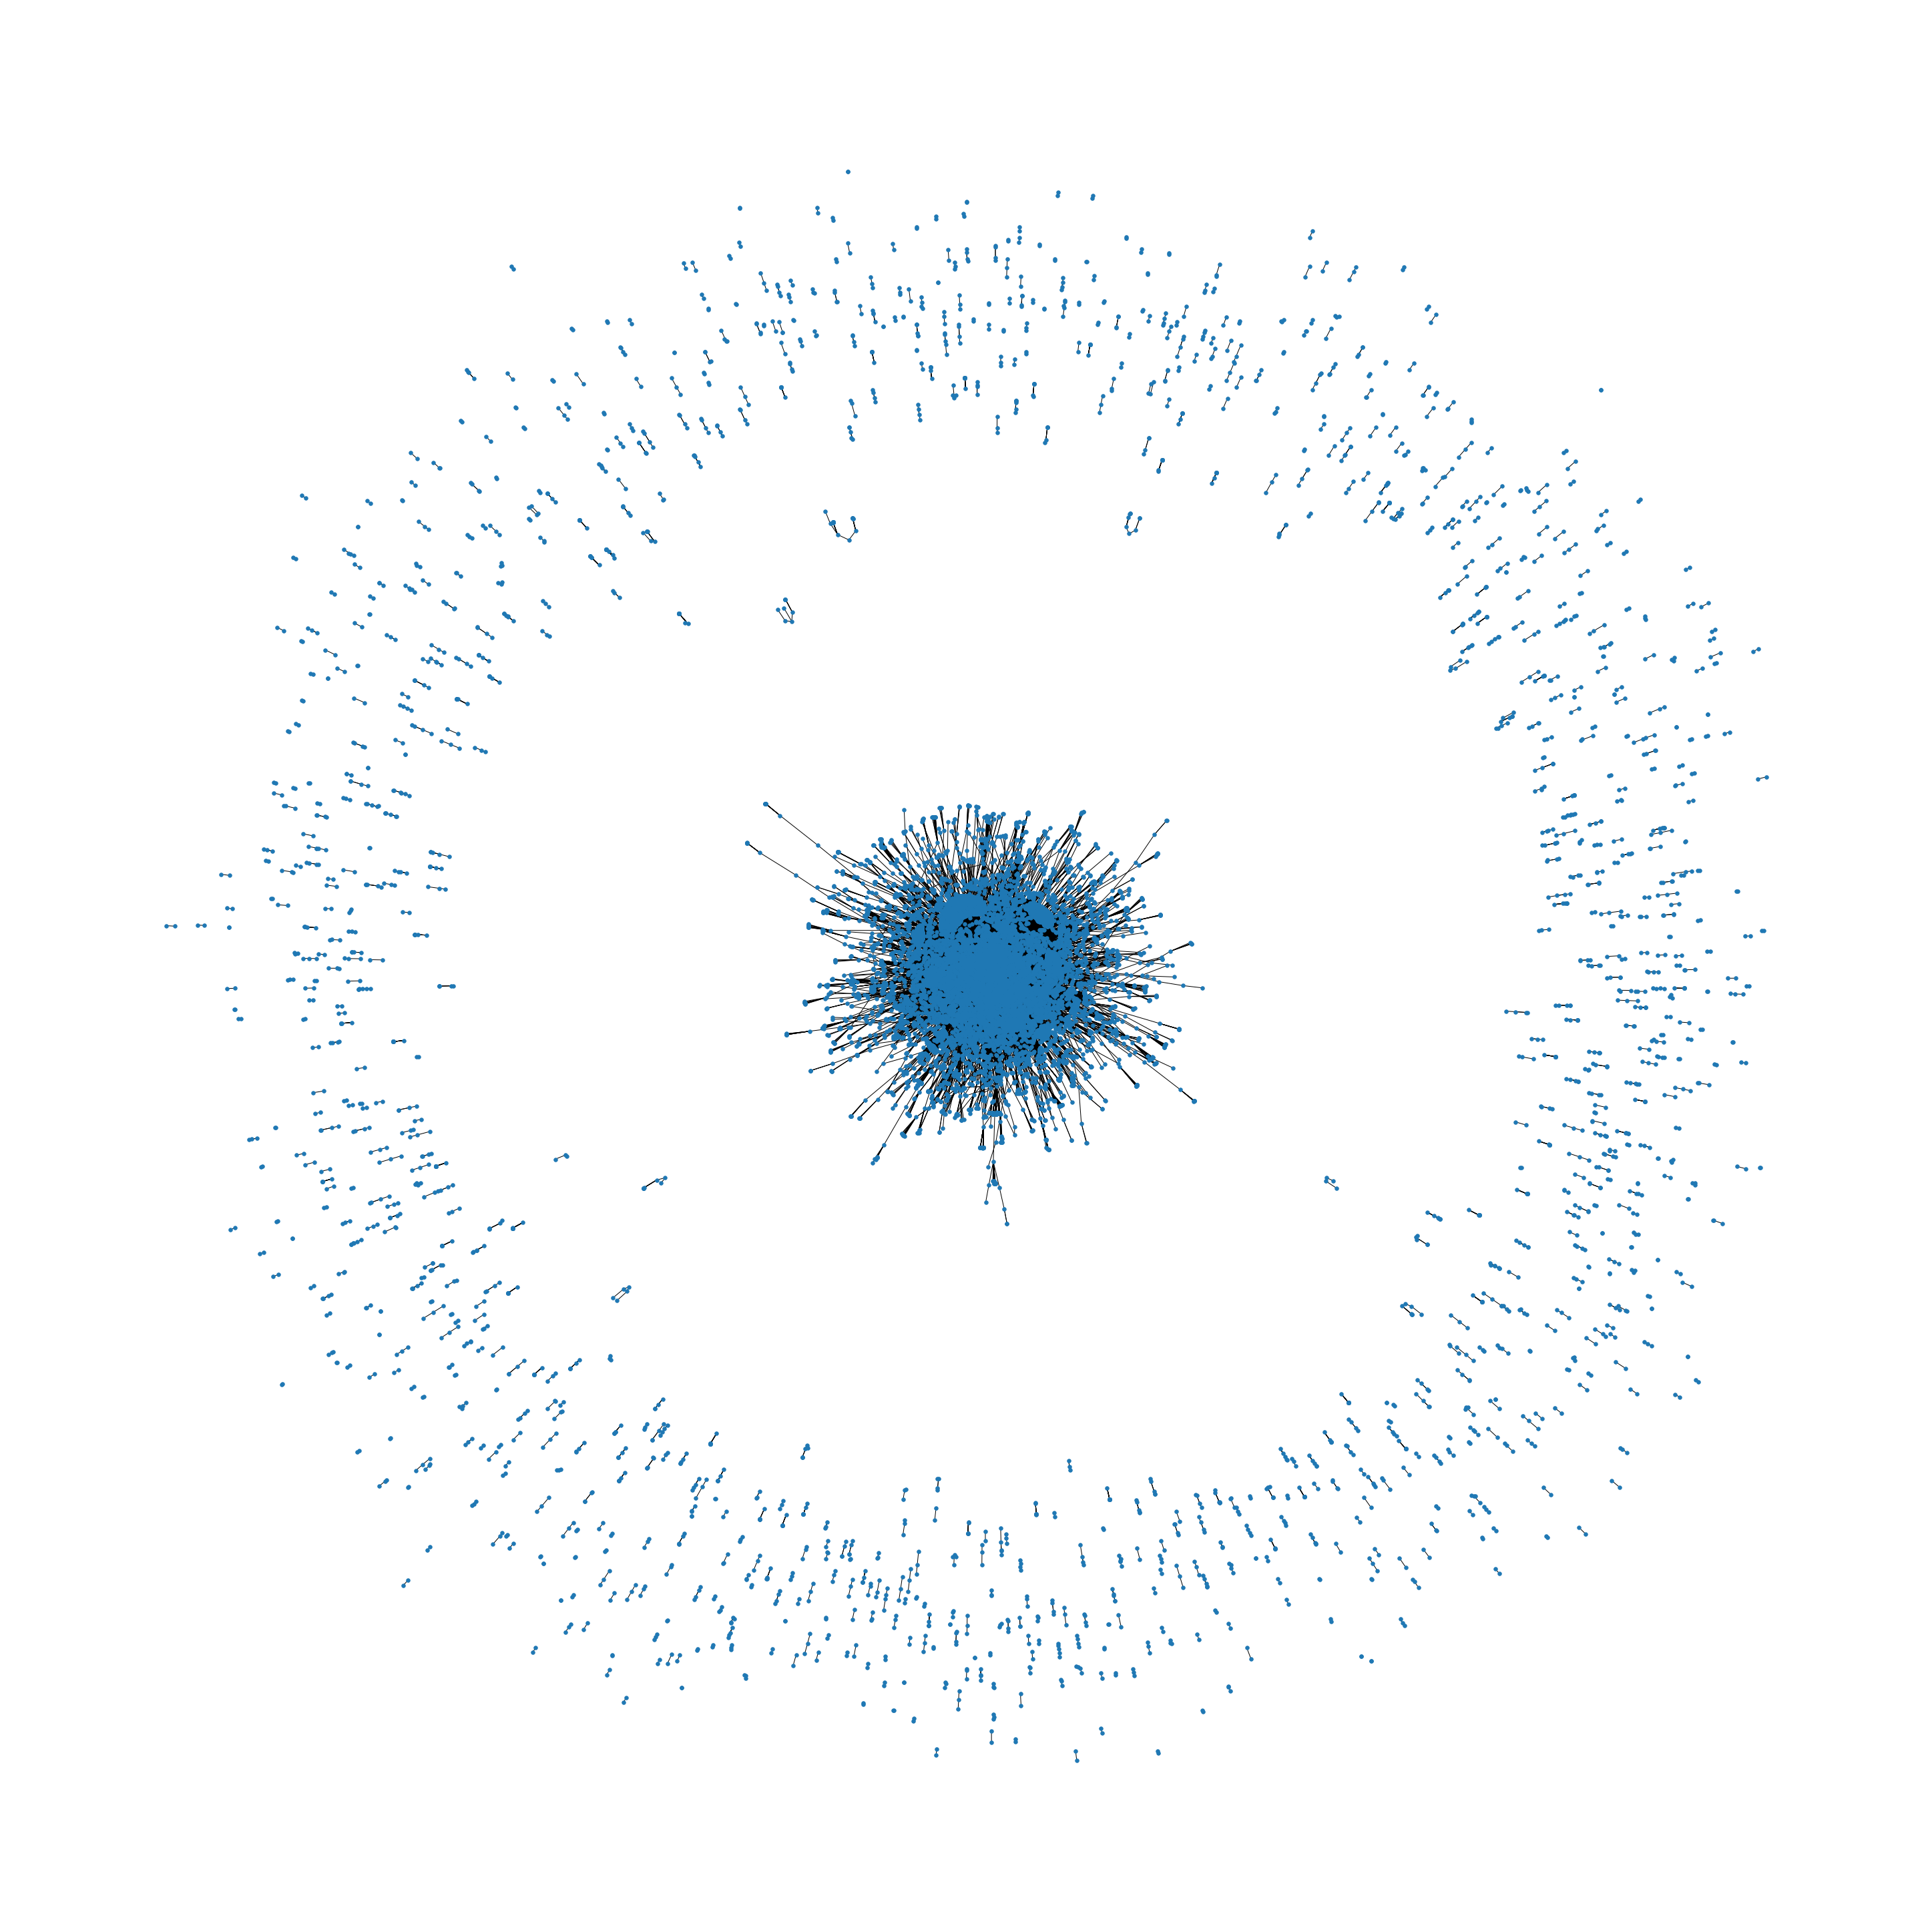

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(40, 40)) 
G = nx.from_pandas_edgelist(df1, 'author', 'parent_id') 
nx.draw(G, node_size=30) 
plt.axis('equal') 
plt.show() 
fig.savefig('waka.svg') 

In [ ]:
df1.author.value_counts()

[deleted]            3297
yaztek               1383
Thatguy2070          1290
patb2015              767
-Vexor-               673
                     ... 
gsuiop                  1
finnaswerve             1
lordkorra               1
tickerdesh              1
John_Harrison1331       1
Name: author, Length: 2591, dtype: int64

In [ ]:
df1.author.value_counts(normalize=True)

[deleted]            0.135646
yaztek               0.056900
Thatguy2070          0.053073
patb2015             0.031556
-Vexor-              0.027689
                       ...   
gsuiop               0.000041
finnaswerve          0.000041
lordkorra            0.000041
tickerdesh           0.000041
John_Harrison1331    0.000041
Name: author, Length: 2591, dtype: float64

In [ ]:
df1.groupby('author')['parent_id'].value_counts()

author         parent_id 
--cole--       t1_f4df8s6    1
-3than         t1_e5h1kiy    1
-Adjudicator-  t1_dmkwiv3    1
-Vexor-        t1_dwy6qem    2
               t1_eau3lgr    2
                            ..
zxtv123        t1_f30hsji    1
               t1_f3xh5jw    1
zzyzzx2        t3_bs111d     1
               t3_bv84o1     1
zzzt_zzzt      t1_ey9bgi4    1
Name: parent_id, Length: 23733, dtype: int64

In [ ]:
df2= df1.groupby('author')['parent_id'].value_counts()

In [ ]:
df2.to_csv("cleareancenw.csv")

In [ ]:
df = pd.read_csv("/content/famous1.csv", index_col=0)

In [ ]:
df.head()

,author,body,retrieved_on,score,parent_id,subreddit
Column1,,,,,,
1,patb2015,"the question is \Foreign influence\""... if you...",1536676836,1,t3_9222j1,SecurityClearance
2,patb2015,did they give you any paperwork?,1536677028,1,t3_91ucbm,SecurityClearance
0,patb2015,List them when the interview comes up mention ...,1536677113,1,t3_91mj0b,SecurityClearance
2,patb2015,Well if you were sacked by usis then you need ...,1536679807,1,t1_e32ne9b,SecurityClearance
1,patb2015,it just means you don't have any automatic dow...,1536825316,1,t3_92rgx1,SecurityClearance


In [ ]:
df1 = pd.read_csv("/content/deleted1.csv", index_col=0)

In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 4.2 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 5.2 MB 32.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.8 MB 45.4 MB/s 
     |████████████████████████████████| 1.2 MB 54.5 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 636 kB 55.5 MB/s 
     |████████████████████████████████| 895 kB 63.0 MB/s 
     |████████████████████████████████| 6.5 MB 19.6 MB/s 
     |████████████████████████████████| 1.1 MB 68.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330784 sha256=375b37931e320c0fae0c13d5afbec6b7cdc5d38756aac9174019643fc1e6036d
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef

In [ ]:
!pip install bertopic[visualization] --quiet

In [ ]:
docs=list(df1.loc[:, 'body'].values)

In [ ]:
from bertopic import BERTopic

In [ ]:
model1 = BERTopic(nr_topics=8)

In [ ]:
new_topics, new_probs  = model1.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
model1.get_topic_freq().head()

,Topic,Count
0,3,2557
1,1,408
2,0,316
3,2,16


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
dtm= cv.fit_transform(df1['body'])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8 , random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=8, random_state=42)

In [ ]:
LDA.components_.shape

(8, 847)

In [ ]:
single_topic= LDA.components_[0]

In [ ]:
single_topic.argsort()

array([ 81, 661,  30, 625, 477, 700, 615, 637, 398, 145, 540, 699, 671,
       209, 745, 368, 264, 334, 113, 131, 586, 786, 740, 688, 553, 364,
       355, 142, 631, 511,  65, 585,  80, 678, 715, 442, 244, 391, 654,
       665, 262, 283, 723, 669, 559, 420,  29,   2, 776, 565, 645, 422,
       724, 353, 346, 473,  94,  22, 352, 551, 777, 642, 720, 512, 325,
       277, 394, 339, 180, 162, 534, 377, 475, 844, 229, 766, 204, 548,
       344, 632, 607, 712, 258, 153, 326, 727, 410, 392, 121, 734, 372,
       294, 743,  70, 375, 307, 797, 469, 371, 523, 482, 538, 683, 806,
       673, 499, 356, 653,  74, 210, 782,  59, 788, 150, 677, 271, 590,
        68, 689, 717, 679, 549, 536, 813, 692, 695, 489, 685, 832,  16,
       239, 178, 744, 151, 498, 122, 493, 719, 662,  95,  15, 635, 842,
       655, 104, 220, 170, 197, 236, 345, 279, 554, 112, 764, 110,  93,
       775, 541, 528, 280, 460, 117, 771, 223, 386, 100, 537, 481, 802,
       287, 315, 522,   3, 335, 500, 400, 366, 577, 828, 254, 37

In [ ]:
import numpy as np
single_topic.argsort()[-10:]
top_twenty_words = single_topic.argsort()[-20:]

In [ ]:
for index in top_twenty_words:
    print(cv.get_feature_names()[index])

quit
paperwork
level
mind
hope
facilities
august
week
boy
old
bring
supervisor
wish
throwaway
november
low
lazy
assistants
desk
deleted


In [ ]:
#Grab the highest probability word per topic
for index,topic in enumerate(LDA.components_):
    print(f"The Top tewnty words for topic number {index}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-20:]])
    print('\n')
    print('\n')

The Top tewnty words for topic number 0
['quit', 'paperwork', 'level', 'mind', 'hope', 'facilities', 'august', 'week', 'boy', 'old', 'bring', 'supervisor', 'wish', 'throwaway', 'november', 'low', 'lazy', 'assistants', 'desk', 'deleted']




The Top tewnty words for topic number 1
['sent', 'manager', 'parents', 'failed', 'granted', 'june', '2018', 'heard', 'usa', 'correct', 'days', 'getting', 'just', 'got', 'years', 'probably', 'oh', 'security', 'secret', 'clearance']




The Top tewnty words for topic number 2
['issue', 'thing', 'job', 'issues', 'history', 'youâ', 'investigation', 'denied', 'time', 'iâ', 'sf86', 'don', 'people', 'like', 'lying', 'interim', 'interview', 'said', 'clearance', 'just']




The Top tewnty words for topic number 3
['told', 'makes', 'record', 'going', 'honest', 'way', 'think', 'drug', 'good', 'background', 'really', 'use', 'try', 'lot', 'yes', 'clearance', 'just', 'thanks', 'like', 'thank']




The Top tewnty words for topic number 4
['don', 'work', 'informati

In [ ]:
topic_results = LDA.transform(dtm)

In [ ]:
# finding the highest index of topic probability for each article 
# let us create a new index that will indicate the number of topic for each article
df1['Topic']= topic_results.argmax(axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pyLDAvis==3.2.2

     |████████████████████████████████| 1.7 MB 17.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135617 sha256=1a0eccc0d2ef436f71a274516010e2cf241d15b8c6581619db2d9d83c314ce0d
  Stored in directory: /root/.cache/pip/wheels/f8/b1/9b/560ac1931796b7303f7b517b949d2d31a4fbc512aad3b9f284
Successfully built pyLDAvis


In [ ]:
import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
